<a href="https://colab.research.google.com/github/veruizr/ML_Doc/blob/main/kNN_blended_metrics_ajustado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `k` Near Neighbors with different metrics

## Upload data
https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset?resource=download

In [ ]:
# prompt: unzip archive (11).zip

#!unzip archive.zip

In [ ]:
# prompt: load in polars .csv file

#!pip install polars

import polars as pl

# Replace 'your_file.csv' with the actual path to your CSV file
df = pl.read_csv('Students_Grading_Dataset.csv')

# Now you can work with the DataFrame 'df'
print(df.head())


shape: (5, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Student_I ┆ First_Nam ┆ Last_Name ┆ Email     ┆ … ┆ Parent_Ed ┆ Family_In ┆ Stress_Le ┆ Sleep_Ho │
│ D         ┆ e         ┆ ---       ┆ ---       ┆   ┆ ucation_L ┆ come_Leve ┆ vel       ┆ urs_per_ │
│ ---       ┆ ---       ┆ str       ┆ str       ┆   ┆ evel      ┆ l         ┆ (1-10)    ┆ Night    │
│ str       ┆ str       ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ str       ┆ str       ┆ i64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ S1000     ┆ Omar      ┆ Williams  ┆ student0@ ┆ … ┆ Master's  ┆ Medium    ┆ 1         ┆ 5.9      │
│           ┆           ┆           ┆ universit ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆           ┆ y.com     ┆   ┆           ┆           

In [ ]:
# prompt: Print columns name and type

df.schema


Schema([('Student_ID', String),
        ('First_Name', String),
        ('Last_Name', String),
        ('Email', String),
        ('Gender', String),
        ('Age', Int64),
        ('Department', String),
        ('Attendance (%)', Float64),
        ('Midterm_Score', Float64),
        ('Final_Score', Float64),
        ('Assignments_Avg', Float64),
        ('Quizzes_Avg', Float64),
        ('Participation_Score', Float64),
        ('Projects_Score', Float64),
        ('Total_Score', Float64),
        ('Grade', String),
        ('Study_Hours_per_Week', Float64),
        ('Extracurricular_Activities', String),
        ('Internet_Access_at_Home', String),
        ('Parent_Education_Level', String),
        ('Family_Income_Level', String),
        ('Stress_Level (1-10)', Int64),
        ('Sleep_Hours_per_Night', Float64)])

## Knowing the data

In [ ]:
# prompt: select the columns: Letter grade ,Stress_Level, Internet, Study hours, Familly income level

df2 = df.select(['Grade', 'Stress_Level (1-10)', 'Internet_Access_at_Home', 'Study_Hours_per_Week', 'Family_Income_Level'])
df2


Grade,Stress_Level (1-10),Internet_Access_at_Home,Study_Hours_per_Week,Family_Income_Level
str,i64,str,f64,str
"""C""",1,"""No""",10.3,"""Medium"""
"""F""",4,"""No""",27.1,"""Low"""
"""F""",9,"""No""",12.4,"""Low"""
"""A""",8,"""Yes""",25.5,"""Low"""
"""A""",6,"""No""",13.3,"""Medium"""
…,…,…,…,…
"""A""",10,"""No""",7.8,"""Medium"""
"""C""",4,"""Yes""",24.2,"""Medium"""
"""D""",5,"""Yes""",7.6,"""High"""


In [ ]:
df2.schema  # Shows column names and their data types

Schema([('Grade', String),
        ('Stress_Level (1-10)', Int64),
        ('Internet_Access_at_Home', String),
        ('Study_Hours_per_Week', Float64),
        ('Family_Income_Level', String)])

In [ ]:
df2.null_count()


Grade,Stress_Level (1-10),Internet_Access_at_Home,Study_Hours_per_Week,Family_Income_Level
u32,u32,u32,u32,u32
0,0,0,0,0


In [ ]:
categorical_cols = [col for col, dtype in df2.schema.items() if dtype == pl.Utf8]
categorical_cols

['Grade', 'Internet_Access_at_Home', 'Family_Income_Level']

In [ ]:
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df2[col].value_counts())


Value counts for Grade:
shape: (5, 2)
┌───────┬───────┐
│ Grade ┆ count │
│ ---   ┆ ---   │
│ str   ┆ u32   │
╞═══════╪═══════╡
│ A     ┆ 997   │
│ D     ┆ 1011  │
│ B     ┆ 1014  │
│ F     ┆ 1003  │
│ C     ┆ 975   │
└───────┴───────┘

Value counts for Internet_Access_at_Home:
shape: (2, 2)
┌─────────────────────────┬───────┐
│ Internet_Access_at_Home ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ No                      ┆ 2480  │
│ Yes                     ┆ 2520  │
└─────────────────────────┴───────┘

Value counts for Family_Income_Level:
shape: (3, 2)
┌─────────────────────┬───────┐
│ Family_Income_Level ┆ count │
│ ---                 ┆ ---   │
│ str                 ┆ u32   │
╞═════════════════════╪═══════╡
│ Low                 ┆ 1687  │
│ High                ┆ 1639  │
│ Medium              ┆ 1674  │
└─────────────────────┴───────┘


In [ ]:
numeric_cols = [col for col, dtype in df2.schema.items() if dtype in [pl.Int64, pl.Float64]]
numeric_cols

['Stress_Level (1-10)', 'Study_Hours_per_Week']

In [ ]:
df2.select(numeric_cols).describe()


statistic,Stress_Level (1-10),Study_Hours_per_Week
str,f64,f64
"""count""",5000.0,5000.0
"""null_count""",0.0,0.0
"""mean""",5.5072,17.52114
"""std""",2.886662,7.193035
"""min""",1.0,5.0
"""25%""",3.0,11.5
"""50%""",6.0,17.4
"""75%""",8.0,23.7
"""max""",10.0,30.0


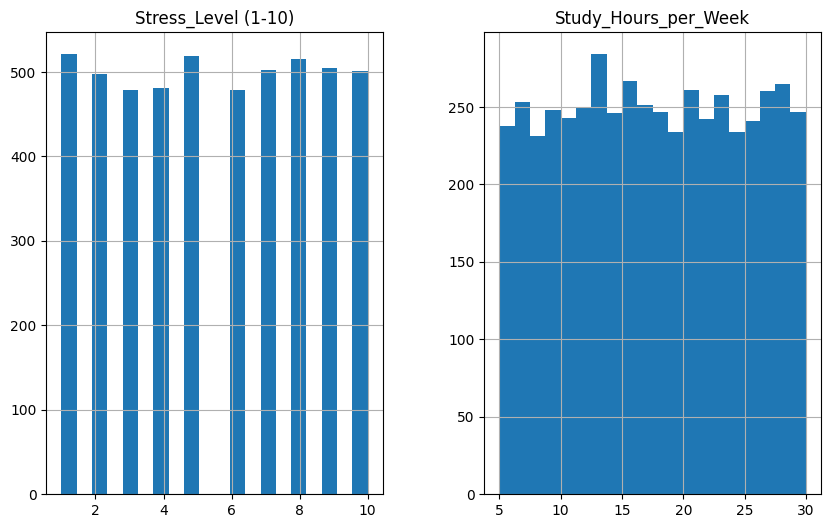

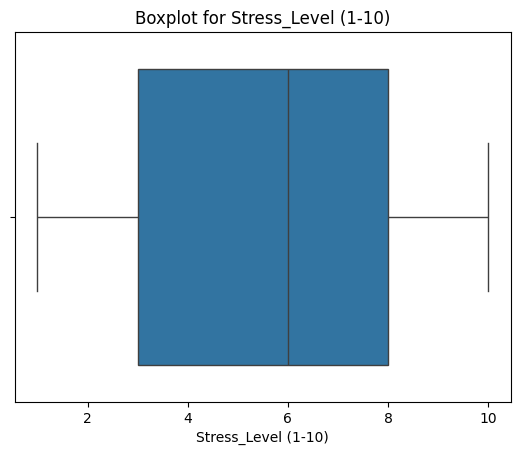

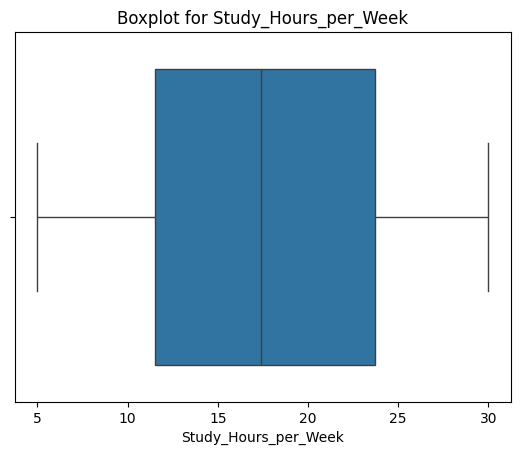

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric data
df2.select(numeric_cols).to_pandas().hist(figsize=(10, 6), bins=20)
plt.show()

# Boxplots for numeric columns
for col in numeric_cols:
    sns.boxplot(x=df2[col].to_pandas())
    plt.title(f"Boxplot for {col}")
    plt.show()


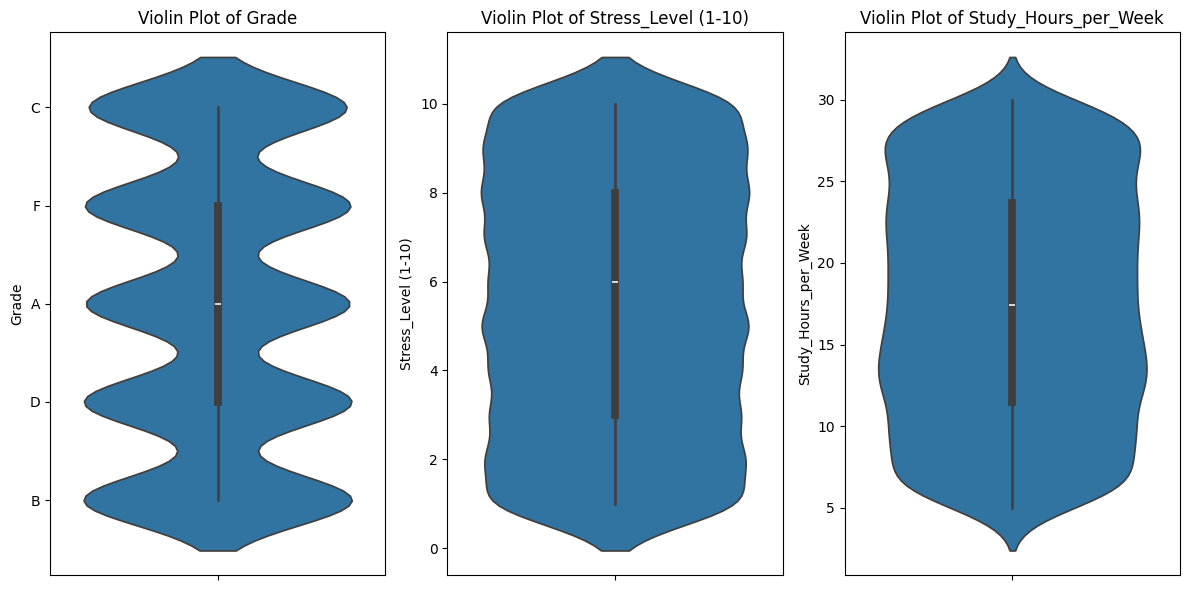

In [ ]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas
df_pandas = df2.to_pandas()

# List of numeric columns
numeric_cols = ['Grade', 'Stress_Level (1-10)', 'Study_Hours_per_Week']

# Create Violin Plots for Numeric Columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.violinplot(y=df_pandas[col])
    plt.title(f"Violin Plot of {col}")

plt.tight_layout()
plt.show()


With the columns measured at school ('Grade', 'Stress_Level (1-10)'), the columns of the house ( 'Internet_Access_at_Home', 'Study_Hours_per_Week', 'Family_Income_Level) will be predicted.

## Knowing the data

In [ ]:
import polars as pl

# Check the actual column types
print(df2.schema)

# Select only truly numeric columns
numeric_cols = [col for col, dtype in df2.schema.items() if dtype in [pl.Int64, pl.Float64]]

print("Numeric columns:", numeric_cols)  # Verify selection

# Apply Min-Max Scaling only to numeric columns
df2 = df2.with_columns([
    ((df2[col] - df2[col].min()) / (df2[col].max() - df2[col].min())).alias(col + "_normalized")
    for col in numeric_cols
])

print(df2)


Schema([('Grade', String), ('Stress_Level (1-10)', Int64), ('Internet_Access_at_Home', String), ('Study_Hours_per_Week', Float64), ('Family_Income_Level', String)])
Numeric columns: ['Stress_Level (1-10)', 'Study_Hours_per_Week']
shape: (5_000, 7)
┌───────┬───────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ Grade ┆ Stress_Level  ┆ Internet_Acc ┆ Study_Hours_ ┆ Family_Incom ┆ Stress_Level ┆ Study_Hours_ │
│ ---   ┆ (1-10)        ┆ ess_at_Home  ┆ per_Week     ┆ e_Level      ┆ (1-10)_norma ┆ per_Week_nor │
│ str   ┆ ---           ┆ ---          ┆ ---          ┆ ---          ┆ lized        ┆ malize…      │
│       ┆ i64           ┆ str          ┆ f64          ┆ str          ┆ ---          ┆ ---          │
│       ┆               ┆              ┆              ┆              ┆ f64          ┆ f64          │
╞═══════╪═══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ C     ┆ 1             ┆ No           ┆ 10.3

In [ ]:


# Define income levels in order
income_levels = ["Low", "Medium", "High"]

# Create cumulative one-hot encoding
df3 = df2.with_columns([
    (df2["Family_Income_Level"].is_in(income_levels[i:])).cast(pl.Int8).alias(f"Income_{level}")
    for i, level in enumerate(income_levels)
])

# Drop the original categorical column
#df3 = df3.drop("Family_Income_Level")

print(df3.head())
df3.schema

shape: (5, 10)
┌───────┬────────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Grade ┆ Stress_Lev ┆ Internet_A ┆ Study_Hour ┆ … ┆ Study_Hou ┆ Income_Lo ┆ Income_Me ┆ Income_Hi │
│ ---   ┆ el (1-10)  ┆ ccess_at_H ┆ s_per_Week ┆   ┆ rs_per_We ┆ w         ┆ dium      ┆ gh        │
│ str   ┆ ---        ┆ ome        ┆ ---        ┆   ┆ ek_normal ┆ ---       ┆ ---       ┆ ---       │
│       ┆ i64        ┆ ---        ┆ f64        ┆   ┆ ize…      ┆ i8        ┆ i8        ┆ i8        │
│       ┆            ┆ str        ┆            ┆   ┆ ---       ┆           ┆           ┆           │
│       ┆            ┆            ┆            ┆   ┆ f64       ┆           ┆           ┆           │
╞═══════╪════════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ C     ┆ 1          ┆ No         ┆ 10.3       ┆ … ┆ 0.212     ┆ 1         ┆ 1         ┆ 0         │
│ F     ┆ 4          ┆ No         ┆ 27.1       ┆ … ┆ 0.884     ┆ 1         ┆

Schema([('Grade', String),
        ('Stress_Level (1-10)', Int64),
        ('Internet_Access_at_Home', String),
        ('Study_Hours_per_Week', Float64),
        ('Family_Income_Level', String),
        ('Stress_Level (1-10)_normalized', Float64),
        ('Study_Hours_per_Week_normalized', Float64),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8)])

In [ ]:
df3.select(["Family_Income_Level",'Income_Low', 'Income_Medium', 'Income_High'])

Family_Income_Level,Income_Low,Income_Medium,Income_High
str,i8,i8,i8
"""Medium""",1,1,0
"""Low""",1,0,0
"""Low""",1,0,0
"""Low""",1,0,0
"""Medium""",1,1,0
…,…,…,…
"""Medium""",1,1,0
"""Medium""",1,1,0
"""High""",1,1,1


In [ ]:
df4 = df3.hstack(df3.select("Grade").to_dummies())
df4.schema

Schema([('Grade', String),
        ('Stress_Level (1-10)', Int64),
        ('Internet_Access_at_Home', String),
        ('Study_Hours_per_Week', Float64),
        ('Family_Income_Level', String),
        ('Stress_Level (1-10)_normalized', Float64),
        ('Study_Hours_per_Week_normalized', Float64),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8),
        ('Grade_A', UInt8),
        ('Grade_B', UInt8),
        ('Grade_C', UInt8),
        ('Grade_D', UInt8),
        ('Grade_F', UInt8)])

In [ ]:
df4.select(['Grade','Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_F'])


Grade,Grade_A,Grade_B,Grade_C,Grade_D,Grade_F
str,u8,u8,u8,u8,u8
"""C""",0,0,1,0,0
"""F""",0,0,0,0,1
"""F""",0,0,0,0,1
"""A""",1,0,0,0,0
"""A""",1,0,0,0,0
…,…,…,…,…,…
"""A""",1,0,0,0,0
"""C""",0,0,1,0,0
"""D""",0,0,0,1,0


In [ ]:
df4 = df4.with_columns(
    df4["Internet_Access_at_Home"].replace({"Yes": 1, "No": 0}).cast(pl.Int8)
)

In [ ]:
df5=df4.drop(["Grade",'Stress_Level (1-10)','Study_Hours_per_Week','Family_Income_Level'])
df5.schema

Schema([('Internet_Access_at_Home', Int8),
        ('Stress_Level (1-10)_normalized', Float64),
        ('Study_Hours_per_Week_normalized', Float64),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8),
        ('Grade_A', UInt8),
        ('Grade_B', UInt8),
        ('Grade_C', UInt8),
        ('Grade_D', UInt8),
        ('Grade_F', UInt8)])

In [ ]:
df5

Internet_Access_at_Home,Stress_Level (1-10)_normalized,Study_Hours_per_Week_normalized,Income_Low,Income_Medium,Income_High,Grade_A,Grade_B,Grade_C,Grade_D,Grade_F
i8,f64,f64,i8,i8,i8,u8,u8,u8,u8,u8
0,0.0,0.212,1,1,0,0,0,1,0,0
0,0.333333,0.884,1,0,0,0,0,0,0,1
0,0.888889,0.296,1,0,0,0,0,0,0,1
1,0.777778,0.82,1,0,0,1,0,0,0,0
0,0.555556,0.332,1,1,0,1,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…
0,1.0,0.112,1,1,0,1,0,0,0,0
1,0.333333,0.768,1,1,0,0,0,1,0,0
1,0.444444,0.104,1,1,1,0,0,0,1,0


In [ ]:
df6 = df5.sample(n=10, shuffle=True, seed=42)

## Combining Euclidean and Hamming distances

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean, hamming
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Custom distance function
def custom_distance(x, y):
    # Euclidean distance for numeric feature (first column)
    euclidean_part = euclidean(x[0:1], y[0:1])

    # Hamming distance for one-hot encoded categorical features (remaining columns)
    hamming_part = hamming(x[1:], y[1:])

    # Combine both distances (weighting can be adjusted)
    print('dist:',hamming_part,euclidean_part,x,y)
    return euclidean_part + hamming_part  # You can adjust weights if needed

# Select Features
X6 = df6.select([
    "Stress_Level (1-10)_normalized",  # Numeric
    "Grade_A", "Grade_B", "Grade_C", "Grade_D", "Grade_F"  # Categorical One-Hot
])

# Select Target
y6 = df6.select(["Income_Low", "Income_Medium", "Income_High"])

# Convert to Pandas for compatibility
X_train, X_test, y_train, y_test = train_test_split(X6.to_pandas(), y6.to_pandas(), test_size=0.2, random_state=42)

# Train KNN with Custom Distance
knn = KNeighborsClassifier(n_neighbors=5, metric=custom_distance)
knn.fit(X_train.to_numpy(), y_train.to_numpy())  # Convert to NumPy for custom distance

# Predict
y_pred = knn.predict(X_test.to_numpy())

dist: 0.0 0.4444444444444444 [0.44444444 0.         0.         0.         1.         0.        ] [0. 0. 0. 0. 1. 0.]
dist: 0.4 0.0 [0.44444444 0.         0.         0.         1.         0.        ] [0.44444444 0.         1.         0.         0.         0.        ]
dist: 0.4 0.33333333333333326 [0.44444444 0.         0.         0.         1.         0.        ] [0.77777778 0.         1.         0.         0.         0.        ]
dist: 0.0 0.4444444444444444 [0.44444444 0.         0.         0.         1.         0.        ] [0.88888889 0.         0.         0.         1.         0.        ]
dist: 0.0 0.4444444444444444 [0.44444444 0.         0.         0.         1.         0.        ] [0.88888889 0.         0.         0.         1.         0.        ]
dist: 0.0 0.2222222222222222 [0.44444444 0.         0.         0.         1.         0.        ] [0.22222222 0.         0.         0.         1.         0.        ]
dist: 0.0 0.0 [0.44444444 0.         0.         0.         1.         0.

## 5 Near Neighbors

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean, hamming
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Custom distance function
def custom_distance(x, y):
    return euclidean(x[0:1], y[0:1]) + hamming(x[1:], y[1:])

# Select Features
X = df5.select([
    "Stress_Level (1-10)_normalized",  # Numeric
    "Grade_A", "Grade_B", "Grade_C", "Grade_D", "Grade_F"  # Categorical One-Hot
])

# Select Target
y = df5.select(["Income_Low", "Income_Medium", "Income_High"])

# Convert to Pandas for compatibility
X_train, X_test, y_train, y_test = train_test_split(X.to_pandas(), y.to_pandas(), test_size=0.2, random_state=42)

# Train KNN with Custom Distance
knn = KNeighborsClassifier(n_neighbors=5, metric=custom_distance)
knn.fit(X_train.to_numpy(), y_train.to_numpy())  # Convert to NumPy for custom distance

# Predict
y_pred = knn.predict(X_test.to_numpy())

## Evaluating

In [ ]:
y_true=y_test.to_numpy()

In [ ]:
y_true.shape

(1000, 3)

In [ ]:
y_true

array([[1, 0, 0],
       [1, 1, 0],
       [1, 0, 0],
       ...,
       [1, 1, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int8)

In [ ]:
y_pred.shape

(1000, 3)

In [ ]:
y_pred

array([[1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]], dtype=int8)

In [ ]:
import numpy as np


# Convert cumulative one-hot encoding to categorical labels
y_true_labels = y_true.sum(axis=1) - 1  # [0, 1, 2, 1, 0]
y_pred_labels = y_pred.sum(axis=1) - 1  # [0, 1, 1, 1, 0]

# Unique class labels
labels = ["Low", "Medium", "High"]

# Compute confusion matrix manually
cm = np.zeros((len(labels), len(labels)), dtype=int)
for i in range(len(y_true_labels)):
    cm[y_true_labels[i], y_pred_labels[i]] += 1

print("Confusion Matrix (NumPy):\n", cm)

Confusion Matrix (NumPy):
 [[ 51 185  86]
 [ 73 187  90]
 [ 56 174  98]]


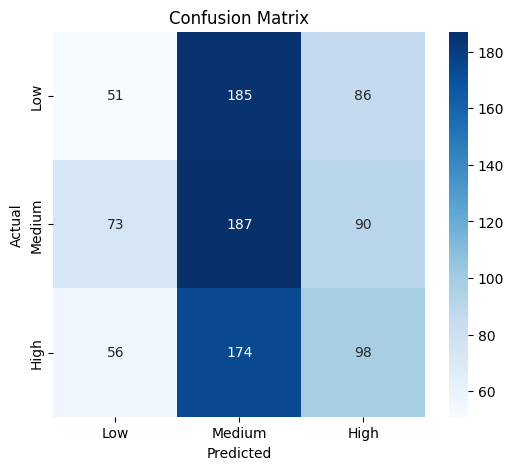

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def compute_error(cm):
    total_errors = cm.sum() - np.trace(cm)  # Misclassified samples
    total_samples = cm.sum()  # All predictions
    return total_errors / total_samples  # Error Rate

# Example usage
error_rate = compute_error(cm)
print(f"Error Rate: {error_rate:.2%}")

Error Rate: 66.40%


## Searching for the best k

In [ ]:

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Example: Features (X) and Labels (y) from training data
#X_train, X_test, y_train, y_test = ...  # Replace with actual split data

# Convert one-hot encoded labels to categorical (if needed)
#y_train = y_train.sum(axis=1) - 1  # Cumulative one-hot decoding
#y_test = y_test.sum(axis=1) - 1

# Function to compute error from confusion matrix
def compute_error(cm):
    return (cm.sum() - np.trace(cm)) / cm.sum()  # Error rate

# Test multiple values of k
k_values = range(1, 21)  # Example: k from 1 to 20
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN
    knn.fit(X_train, y_train)  # Fit model
    y_pred = knn.predict(X_test)  # Predict

    # Compute confusion matrix & error rate
    cm = confusion_matrix(y_test, y_pred)
    error = compute_error(cm)
    errors.append(error)

# Find the best k
best_k = k_values[np.argmin(errors)]
print(f"Best k: {best_k} with Error Rate: {min(errors):.2%}")

ValueError: multilabel-indicator is not supported

In [33]:
errors

[]

## To Do

* How can you evaluate the hypothesis that the problem with almost all predictions giving `Medium` is due to the disproportionate data in that column?
* Predict the numeric variable `Study_Hours_per_Week_normalized`, determine the error for each `k` and choice the best `k`.
* Add new variables that can improve performance.



#1. Hipótesis datos desproporcionados

Se puede analizar la distribución de clases, verificando cuántas instancias hay de cada categoría (Low, Medium, High) en la columna Family_Income_Level. Si hay una mayoría mu evidente de instancias *"Medium"*, el modelo podría estar sesgado hacia esa clase.

In [38]:
# Ver distribución de clases en Family_Income_Level



print(df['Family_Income_Level'].value_counts(normalize=True))



shape: (3, 2)
┌─────────────────────┬────────────┐
│ Family_Income_Level ┆ proportion │
│ ---                 ┆ ---        │
│ str                 ┆ f64        │
╞═════════════════════╪════════════╡
│ Medium              ┆ 0.3348     │
│ Low                 ┆ 0.3374     │
│ High                ┆ 0.3278     │
└─────────────────────┴────────────┘


El resultado desmiente la hipótesis en la medida que la distribución es muy equilibrada en todas las clases, por lo tanto no es posible atribuir a una desproporción de los datos que la predicción de *Medium* en la mayoria de los casos.

#2. Predecir la  variable numerica *Study_Hours_per_Week_normalized*, determinar el error para cada *k* y escoger el mejor *k*

1. normalización de los datos usando sklearn Minmaxscaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
import polars as pl

df8 = pl.read_csv('Students_Grading_Dataset.csv')
# Normalizar Study_Hours_per_Week
scaler = MinMaxScaler()

df8 = df8.with_columns(
    pl.Series(
        name='Study_Hours_per_Week_normalized',
        values=scaler.fit_transform(df[['Study_Hours_per_Week']]).flatten() # Flatten to a 1D array
    )
)


2. Dividir datos entre entrenamiento y prueba

In [44]:
from sklearn.model_selection import train_test_split

# Seleccionar características (X) y variable objetivo (y)
X = df8[['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Projects_Score']]
y = df8['Study_Hours_per_Week_normalized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Evaluar diferentes valores de k

k = 1 --> MSE = 0.1640
k = 2 --> MSE = 0.1224
k = 3 --> MSE = 0.1084
k = 4 --> MSE = 0.1020
k = 5 --> MSE = 0.0985
k = 6 --> MSE = 0.0963
k = 7 --> MSE = 0.0941
k = 8 --> MSE = 0.0914
k = 9 --> MSE = 0.0899
k = 10 --> MSE = 0.0890


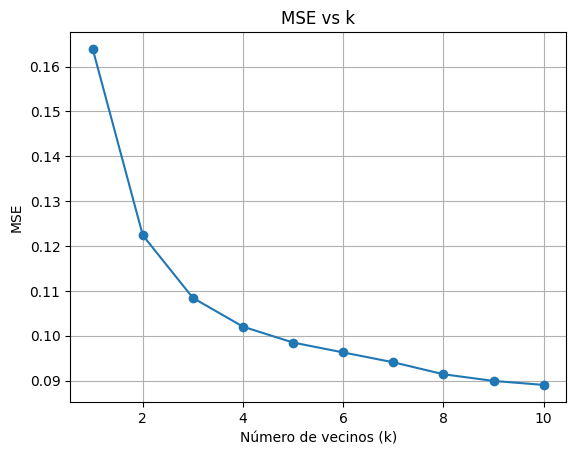

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Evaluar para varios k
errors = []
k_values = range(1, 11)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Mostrar errores
for k, err in zip(k_values, errors):
    print(f'k = {k} --> MSE = {err:.4f}')

# Gráfico de MSE vs k
plt.plot(k_values, errors, marker='o')
plt.title('MSE vs k')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

#3. Agregar nuevas variables que puedan mejorar el desempeño

Se agregarán nuevas variables que pueden correlacionarse con las horas de estudio

| Variable 1           | Variable 2              | Posible interacción                          | Justificación                                      |
|----------------------|-------------------------|----------------------------------------------|---------------------------------------------------|
| Stress_Level (1-10)  | Sleep_Hours_per_Night   | Stress_per_Sleep = Stress / Sleep            | Poco sueño + mucho estrés suele afectar desempeño |
| Attendance (%)       | Study_Hours_per_Week    | Effective_Study = Attendance * Study_Hours   | Combinación de presencia y estudio efectivo       |


se incluirán variables categóricas pasadas a numéricas

*   Extracurricular_Activities
*   Internet_Access_at_Home




MSE con nuevas variables derivadas (k=10): 0.0044


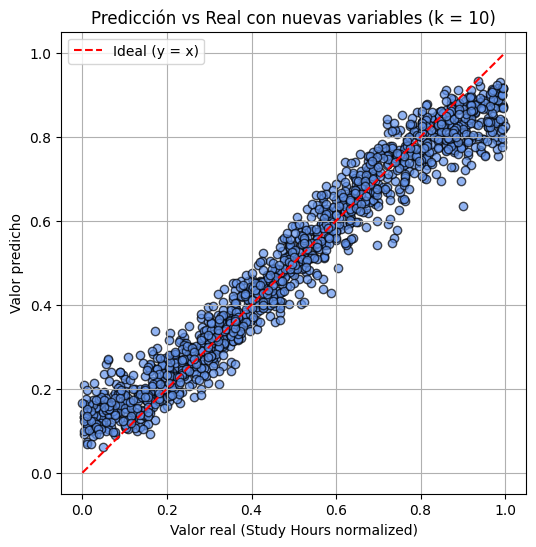

In [64]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar dataset
df9 = pl.read_csv("Students_Grading_Dataset.csv")


# Convertir variables categóricas a numéricas
df9 = df9.with_columns(
    pl.when(pl.col("Extracurricular_Activities") == "Yes").then(1).otherwise(0).alias("Extracurricular_Activities_num"),
    pl.when(pl.col("Internet_Access_at_Home") == "Yes").then(1).otherwise(0).alias("Internet_Access_at_Home_num")
)
df = df.with_columns([
    (pl.col('Extracurricular_Activities').map_elements(lambda x: 1 if x == 'Yes' else 0, return_dtype=pl.Int32)).alias('Extracurricular_Activities_num'),
    (pl.col('Internet_Access_at_Home').map_elements(lambda x: 1 if x == 'Yes' else 0, return_dtype=pl.Int32)).alias('Internet_Access_at_Home_num')
])

# Crear nuevas variables derivadas
df9 = df9.with_columns([
    # Evitamos división por cero en horas de sueño (mínimo 1 h)
    ( (pl.col("Stress_Level (1-10)") / pl.col("Sleep_Hours_per_Night").cast(float).clip(1,None)) ).alias("Stress_per_Sleep"),
    ( (pl.col("Attendance (%)") * pl.col("Study_Hours_per_Week")) ).alias("Effective_Study")
])

# Definir características (X) y variable objetivo (y)
X_cols = [
    'Attendance (%)','Sleep_Hours_per_Night', 'Stress_Level (1-10)',
    'Extracurricular_Activities_num', 'Internet_Access_at_Home_num',
    'Stress_per_Sleep', 'Effective_Study'
]

X_pl = df9.select(X_cols).fill_null(0)
y_pl = df8.select('Study_Hours_per_Week_normalized')

# 5️⃣ Convertir a NumPy
X = X_pl.to_numpy()
y = y_pl.to_numpy().flatten()

# 6️⃣ Escalar X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7️⃣ Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 8️⃣ Entrenar kNN con k
best_k = 10
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

# 9️⃣ Predicciones y evaluación
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"MSE con nuevas variables derivadas (k={best_k}): {mse:.4f}")

# 🔟 Gráfico Predicción vs Real
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='cornflowerblue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal (y = x)')
plt.xlabel("Valor real (Study Hours normalized)")
plt.ylabel("Valor predicho")
plt.title(f"Predicción vs Real con nuevas variables (k = {best_k})")
plt.legend()
plt.grid(True)
plt.show()
